In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
for w in words[:1]:
    for ch1,ch2 in zip(w, w[1:]):
       print(ch1, ch2)

e m
m m
m a


In [8]:
for w in words[:1]:
    chs = ['<S>']+ list(w) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
       print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [10]:
b = {}
for w in words:
     chs = ['<S>']+ list(w) + ['<E>']
     for ch1,ch2 in zip(chs, chs[1:]):
         bigram = (ch1,ch2)
         b[bigram] = b.get(bigram, 0)+1
         #print(ch1, ch2)

In [12]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [15]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [16]:
a[1,3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [18]:
N = torch.zeros((28,28), dtype=torch.int32)

In [20]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>']=26
stoi['<E>']=27

In [21]:
for w in words:
    chs = ['<S>']+ list(w) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

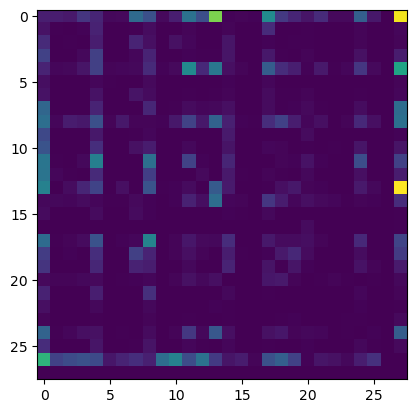

In [22]:
plt.imshow(N)

In [24]:
itos = {i:s for s,i in stoi.items()} 
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [30]:
type(N[3,4].item())

int

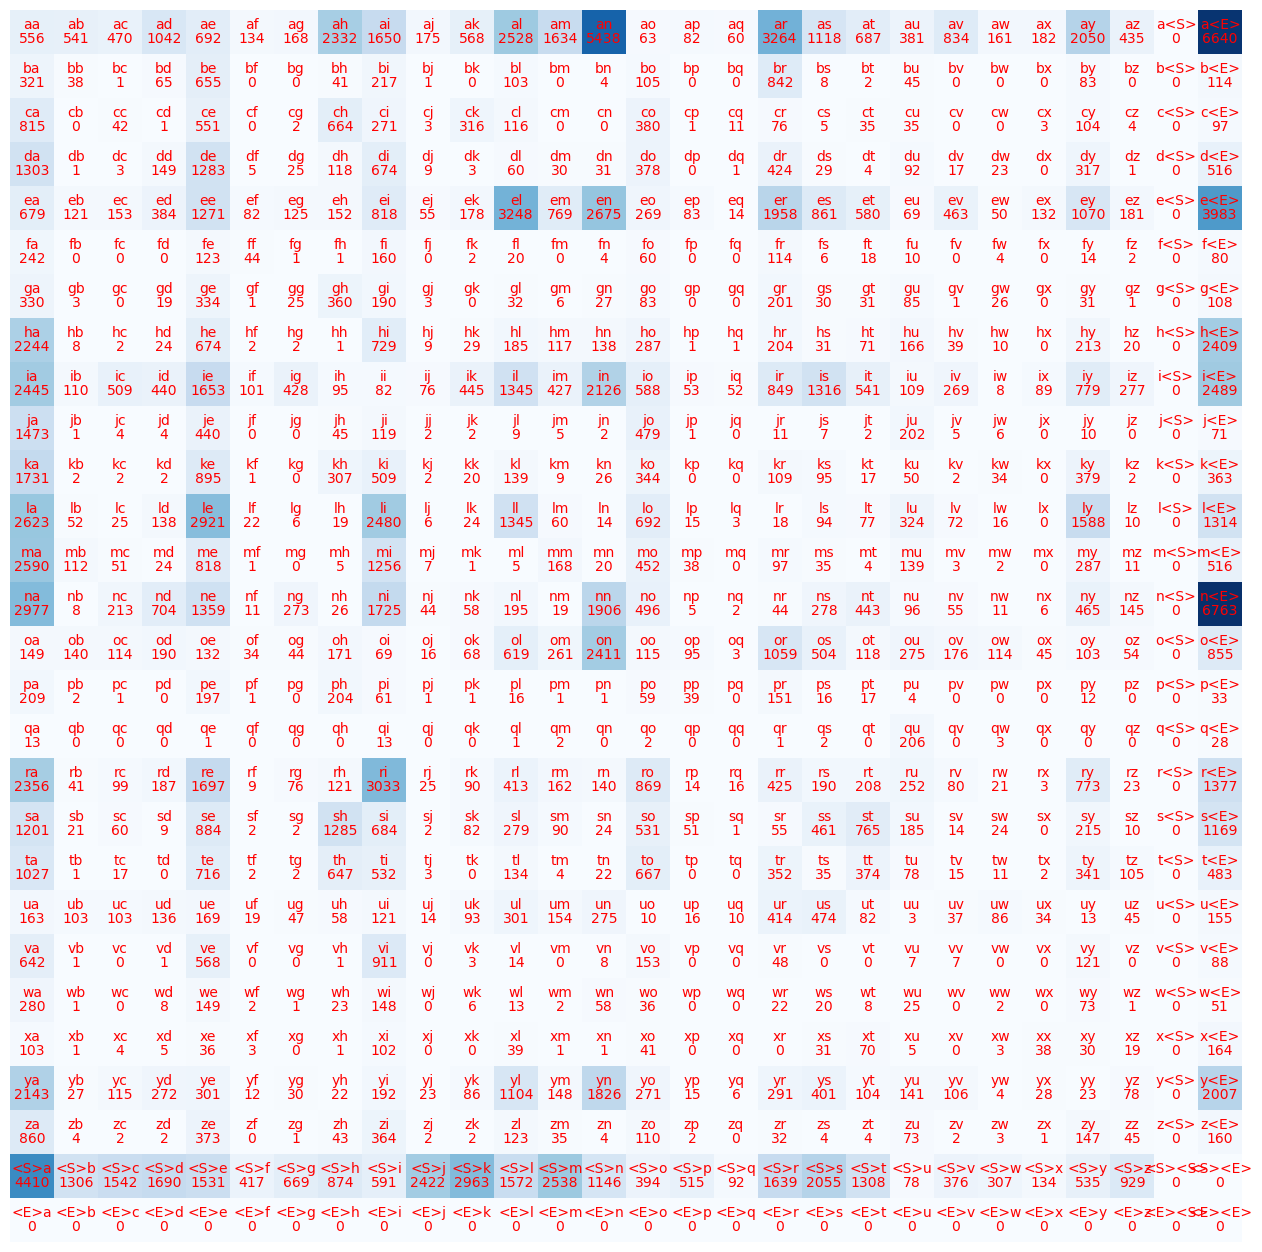

In [25]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
   for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='red')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='red')
plt.axis('off');

In [31]:
N = torch.zeros((27,27), dtype=torch.int32)

In [32]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 
itos = {i:s for s,i in stoi.items()}   
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [153]:
for w in words:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

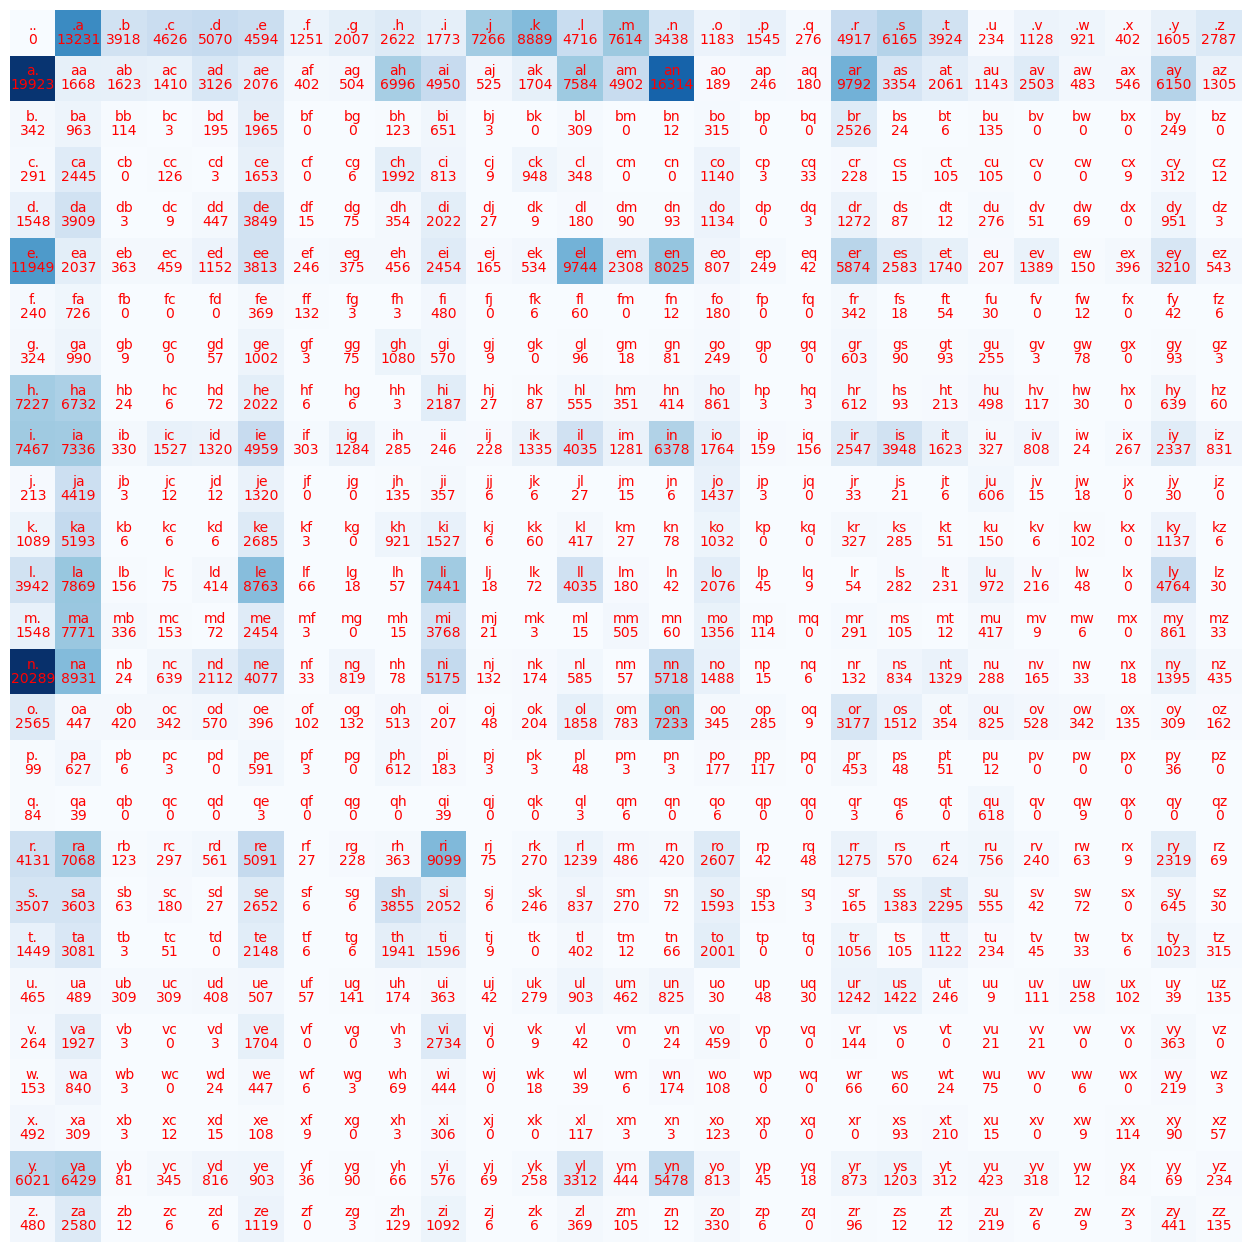

In [154]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='red')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='red')
plt.axis('off');

In [155]:
N[0] #or N[0, :]

tensor([    0, 13231,  3918,  4626,  5070,  4594,  1251,  2007,  2622,  1773,
         7266,  8889,  4716,  7614,  3438,  1183,  1545,   276,  4917,  6165,
         3924,   234,  1128,   921,   402,  1605,  2787], dtype=torch.int32)

In [156]:
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [157]:
p.sum()

tensor(1.0000)

In [158]:
g = torch.Generator().manual_seed(2147483647)
p1 = torch.rand(3, generator=g)
# p1 = torch.rand(3)
p1 = p1 / p1.sum()
p1

tensor([0.6064, 0.3033, 0.0903])

In [159]:
torch.multinomial(p1, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [160]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [161]:
g = torch.Generator().manual_seed(2147483647)

ix = 0
while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print(itos[ix])
    if ix == 0:
        break

c
e
x
z
e
.


In [162]:
g = torch.Generator().manual_seed(2147483647)

ix = 0
out = []
while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
        break
print(''.join(out))

cexze.


In [163]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0
    out = []
    while True:
        p = N[ix].float()
        p = p / p.sum()
        #p = torch.ones(27)/27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [164]:
p.shape

torch.Size([27])

In [165]:
P = N.float()
P.sum(0, keepdims=True).shape

torch.Size([1, 27])

In [166]:
P = N.float()
P /= P.sum(1, keepdims=True)

In [167]:
# 27, 27
# 27, 01

In [168]:
P[0].sum()

tensor(1.0000)

In [169]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [170]:
P = N.float()
P.sum(1, keepdims=True).shape

torch.Size([27, 1])

In [171]:
P.sum(1).shape

torch.Size([27])

In [172]:
# Broadcasting will add the "1"
# 27, 27
#  1, 27

In [173]:
P = N.float()
P /= P.sum(1)

In [174]:
P[0].sum()

tensor(7.0225)

In [175]:
P[:,0].sum()

tensor(1.)

In [207]:
P = N.float()
P /= P.sum(1, keepdims=True)

In [177]:
for w in words[:3]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(f'{ch1},{ch2}')

.,e
e,m
m,m
m,a
a,.
.,o
o,l
l,i
i,v
v,i
i,a
a,.
.,a
a,v
v,a
a,.


In [178]:
for w in words[:3]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1},{ch2}: {prob: .4f}')

.,e:  0.0478
e,m:  0.0377
m,m:  0.0253
m,a:  0.3900
a,.:  0.1960
.,o:  0.0123
o,l:  0.0781
l,i:  0.1777
i,v:  0.0152
v,i:  0.3541
i,a:  0.1381
a,.:  0.1960
.,a:  0.1377
a,v:  0.0246
v,a:  0.2496
a,.:  0.1960


In [179]:
# Equally likely probability
1/27

0.037037037037037035

### how to summarize these probabilities into a single number ...
#### Answer: Maximum likelihood estimation 
#### The product of these probabilities is the likelihood and it should be very high ...
#### since the product of these numbers are very small, for convenience people work with log likelihood 

In [180]:
for w in words[:3]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        print(f'{ch1},{ch2}: {prob: .4f} {logprob: .4f}')

.,e:  0.0478 -3.0407
e,m:  0.0377 -3.2789
m,m:  0.0253 -3.6753
m,a:  0.3900 -0.9417
a,.:  0.1960 -1.6297
.,o:  0.0123 -4.3974
o,l:  0.0781 -2.5503
l,i:  0.1777 -1.7277
i,v:  0.0152 -4.1855
v,i:  0.3541 -1.0382
i,a:  0.1381 -1.9795
a,.:  0.1960 -1.6297
.,a:  0.1377 -1.9828
a,v:  0.0246 -3.7041
v,a:  0.2496 -1.3880
a,.:  0.1960 -1.6297


#### WHY Log

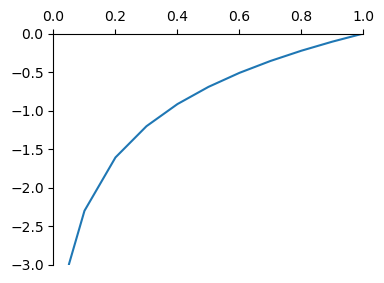

In [202]:
x = [0.025, 0.05] + [i.item() for i in np.linspace(.1, 1, 10)]
logx = [math.log(i) for i in x]

fig, ax = plt.subplots()
plt.ylim(-3, 0)
plt.xlim(0, 1)
ax.plot(x, logx)

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

fig.set_figwidth(4)
fig.set_figheight(3)

plt.show()

### Log of pro
$log(a \times b \times c) = log(a) + log(b) + log(c)$

In [181]:
log_likelihood = 0.0
for w in words[:3]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1},{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')

.,e:  0.0478 -3.0407
e,m:  0.0377 -3.2789
m,m:  0.0253 -3.6753
m,a:  0.3900 -0.9417
a,.:  0.1960 -1.6297
.,o:  0.0123 -4.3974
o,l:  0.0781 -2.5503
l,i:  0.1777 -1.7277
i,v:  0.0152 -4.1855
v,i:  0.3541 -1.0382
i,a:  0.1381 -1.9795
a,.:  0.1960 -1.6297
.,a:  0.1377 -1.9828
a,v:  0.0246 -3.7041
v,a:  0.2496 -1.3880
a,.:  0.1960 -1.6297
log_likelihood=tensor(-38.7793)


#### This is not something that we like because we want the Loss function, where low is good because we want to minimize the loss.
#### So, we will invert this 

In [183]:
log_likelihood = 0.0

for w in words[:3]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1},{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')

.,e:  0.0478 -3.0407
e,m:  0.0377 -3.2789
m,m:  0.0253 -3.6753
m,a:  0.3900 -0.9417
a,.:  0.1960 -1.6297
.,o:  0.0123 -4.3974
o,l:  0.0781 -2.5503
l,i:  0.1777 -1.7277
i,v:  0.0152 -4.1855
v,i:  0.3541 -1.0382
i,a:  0.1381 -1.9795
a,.:  0.1960 -1.6297
.,a:  0.1377 -1.9828
a,v:  0.0246 -3.7041
v,a:  0.2496 -1.3880
a,.:  0.1960 -1.6297
log_likelihood=tensor(-38.7793)
nll=tensor(38.7793)


#### For convinience, people like to use the average

In [186]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
#for w in ["andrejq"]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:,.4f}')
        
nll =-log_likelihood
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n=}')

.e: 0.0478 -3.0407
em: 0.0377 -3.2789
mm: 0.0253 -3.6753
ma: 0.3900 -0.9417
a.: 0.1960 -1.6297
.o: 0.0123 -4.3974
ol: 0.0781 -2.5503
li: 0.1777 -1.7277
iv: 0.0152 -4.1855
vi: 0.3541 -1.0382
ia: 0.1381 -1.9795
a.: 0.1960 -1.6297
.a: 0.1377 -1.9828
av: 0.0246 -3.7041
va: 0.2496 -1.3880
a.: 0.1960 -1.6297
log_likelihood=tensor(-38.7793)
nll=tensor(38.7793)
nll/n=tensor(2.4237)


#### GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
#### equivalent to maximizing the log likelihood (because log is monotonic)
#### equivalent to minimizing the negative log likelihood
#### equivalent to minimizing the average negative log likelihood
#### we now have a model (bigram) with parameter. Our goal is to train these model and optimize the parameter to minimize the loss. We will use NN to train the model to compute the parameter value and optimize the weight

In [203]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        
nll =-log_likelihood
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-559891.0625)
nll=tensor(559891.0625)
nll/n=tensor(2.4541)


# How to test a single word

In [208]:
log_likelihood = 0.0
n = 0

for w in ["andrej"]:
# for w in ["andrejq"]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:,.4f}')
        
nll =-log_likelihood
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n=}')

.a: 0.1377 -1.9828
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
j.: 0.0245 -3.7098
log_likelihood=tensor(-21.2735)
nll=tensor(21.2735)
nll/n=tensor(3.0391)


### If the log_likelihood = inf, which means the probablity is zero, which is not diserable, therefore, we need model 
### We will add 1 as a fake count to smooth the model

In [209]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [210]:
log_likelihood = 0.0
n = 0

for w in ["andrejq"]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:,.4f}')
        
nll =-log_likelihood
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll/n=}')

.a: 0.1376 -1.9831
an: 0.1604 -1.8298
nd: 0.0384 -3.2594
dr: 0.0771 -2.5629
re: 0.1336 -2.0133
ej: 0.0027 -5.9115
jq: 0.0001 -9.0742
q.: 0.1008 -2.2943
log_likelihood=tensor(-28.9284)
nll=tensor(28.9284)
nll/n=tensor(3.6160)


# We will now cast the same problem using Neural Net and come to a similar model
# Same input, a single char and same output the probability of the next char

In [213]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [214]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


## This means the NN is trained such a way that when the input is 'e' or index of input is '5' the probablity of 'm' or index='13' is high.

In [219]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.Tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [220]:
xs.dtype

torch.float32

In [221]:
ys.dtype

torch.int64

In [222]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


# How to feed an integer to NN, just an integer may not makes sense
# Common way to encode and integer is 1-hop encoding. 
# E.g. for 13, we create a vector of all 0s except the 13th position is 1

In [223]:
import torch.nn.functional as F

In [224]:
F.one_hot(xs, num_classes=27)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [227]:
xenc = F.one_hot(xs, num_classes=27).float()

In [228]:
xenc.shape

torch.Size([5, 27])

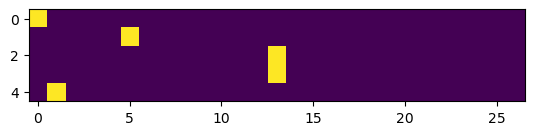

In [229]:
plt.imshow(xenc)

In [230]:
xenc.dtype

torch.float32

In [231]:
W = torch.randn(27,1)
W

tensor([[-2.0178],
        [-1.4064],
        [-1.4131],
        [-0.1606],
        [ 0.0997],
        [-0.0150],
        [ 0.2521],
        [-0.9564],
        [ 0.3471],
        [ 0.5984],
        [-0.5591],
        [-0.4089],
        [-0.0570],
        [-0.1853],
        [-0.3502],
        [-1.1318],
        [-1.4304],
        [-1.1138],
        [-2.2645],
        [-0.7457],
        [-1.5146],
        [-0.7941],
        [-0.3289],
        [ 0.9342],
        [-0.5743],
        [-0.2338],
        [-1.5299]])

In [232]:
W.shape

torch.Size([27, 1])

In [233]:
xenc.shape

torch.Size([5, 27])

In [234]:
W = torch.randn(27,1)
xenc @ W

tensor([[-0.7160],
        [ 1.2368],
        [ 0.1469],
        [ 0.1469],
        [ 1.4410]])

In [235]:
W = torch.randn(27,27)
xenc @ W

tensor([[-1.2759e+00,  6.4289e-01,  1.3241e-01, -1.8300e+00,  1.0433e+00,
          9.2220e-01,  6.0820e-02, -2.0256e+00,  1.6856e+00,  5.3906e-01,
         -6.0315e-01,  8.1595e-01,  1.0449e-01,  1.2031e+00,  4.6152e-01,
          7.3866e-01, -1.6117e+00,  4.7775e-01, -2.2231e-01, -1.9099e-01,
          1.4135e+00,  4.0804e-01,  2.3668e-01,  7.8153e-01, -1.0134e+00,
          1.2990e+00,  2.3911e-01],
        [-5.0632e-01, -3.7958e-01, -1.3404e+00, -5.5938e-01, -4.5399e-01,
          1.9254e+00, -9.5635e-01,  1.0363e+00,  8.4380e-01,  2.5413e-01,
         -4.8798e-01, -2.7519e+00, -5.6409e-01, -2.5412e-01,  8.0036e-02,
          6.0076e-01, -4.9278e-01,  4.1947e-01, -1.2082e+00, -4.0805e-01,
          1.6025e+00,  6.0160e-01, -1.8867e+00,  3.9751e-01, -2.8069e+00,
          9.6272e-01,  4.5395e-01],
        [ 1.1501e+00, -4.1475e-01,  4.4191e-01, -8.4062e-02,  3.2427e-02,
          9.7584e-01, -2.9266e-01, -1.2384e+00, -3.2426e-02,  7.5429e-01,
         -4.1742e-01, -6.0593e-01,  2.02

In [236]:
# (5 x 27) x (27 x 27) => (5 x 27)
(xenc @ W).shape

torch.Size([5, 27])

In [237]:
(xenc @ W)[3, 13]

tensor(0.3464)

In [143]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [144]:
W[:,13]

tensor([-2.9875, -0.2129,  0.2475,  1.2994, -1.0393, -0.6980, -0.5489, -1.3044,
         0.3900,  0.3082,  0.1970,  0.9866,  0.6124, -0.0850,  0.1748, -0.2019,
         0.3180,  0.4346, -0.8816,  0.0031,  0.7253,  1.0729, -0.6571,  0.6590,
         0.4402,  1.6734,  1.1022])

In [238]:
(xenc[3] * W[:,13]).sum()

tensor(0.3464)

# How exponentiation behaves

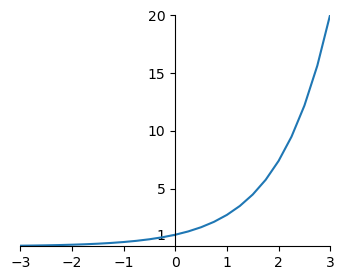

In [262]:
x = [i.item() for i in np.linspace(-3, 3, 25)]
logx = [math.exp(i) for i in x]

fig, ax = plt.subplots()

plt.yticks([1, 5, 10, 15, 20])
plt.xlim(-3, 3)
plt.ylim(bottom=0)

ax.plot(x, logx)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('center')

#ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

fig.set_figwidth(4)
fig.set_figheight(3)

plt.show()

In [263]:
(xenc @ W).exp()

tensor([[0.2792, 1.9020, 1.1416, 0.1604, 2.8385, 2.5148, 1.0627, 0.1319, 5.3955,
         1.7144, 0.5471, 2.2613, 1.1101, 3.3305, 1.5865, 2.0931, 0.1996, 1.6124,
         0.8007, 0.8261, 4.1103, 1.5039, 1.2670, 2.1848, 0.3630, 3.6658, 1.2701],
        [0.6027, 0.6841, 0.2617, 0.5716, 0.6351, 6.8582, 0.3843, 2.8188, 2.3252,
         1.2893, 0.6139, 0.0638, 0.5689, 0.7756, 1.0833, 1.8235, 0.6109, 1.5212,
         0.2987, 0.6649, 4.9654, 1.8250, 0.1516, 1.4881, 0.0604, 2.6188, 1.5745],
        [3.1586, 0.6605, 1.5557, 0.9194, 1.0330, 2.6534, 0.7463, 0.2898, 0.9681,
         2.1261, 0.6587, 0.5456, 1.2239, 1.4140, 0.3860, 0.5333, 9.3701, 1.4226,
         3.2250, 0.7589, 1.8778, 1.5591, 1.0556, 0.6007, 1.0025, 0.7856, 4.1113],
        [3.1586, 0.6605, 1.5557, 0.9194, 1.0330, 2.6534, 0.7463, 0.2898, 0.9681,
         2.1261, 0.6587, 0.5456, 1.2239, 1.4140, 0.3860, 0.5333, 9.3701, 1.4226,
         3.2250, 0.7589, 1.8778, 1.5591, 1.0556, 0.6007, 1.0025, 0.7856, 4.1113],
        [0.5779, 2.4430,

In [264]:
logits = xenc @ W #log-counts
counts = logits.exp() #equivalent of N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0061, 0.0415, 0.0249, 0.0035, 0.0619, 0.0548, 0.0232, 0.0029, 0.1176,
         0.0374, 0.0119, 0.0493, 0.0242, 0.0726, 0.0346, 0.0456, 0.0044, 0.0351,
         0.0175, 0.0180, 0.0896, 0.0328, 0.0276, 0.0476, 0.0079, 0.0799, 0.0277],
        [0.0162, 0.0184, 0.0070, 0.0154, 0.0171, 0.1847, 0.0103, 0.0759, 0.0626,
         0.0347, 0.0165, 0.0017, 0.0153, 0.0209, 0.0292, 0.0491, 0.0164, 0.0410,
         0.0080, 0.0179, 0.1337, 0.0491, 0.0041, 0.0401, 0.0016, 0.0705, 0.0424],
        [0.0708, 0.0148, 0.0348, 0.0206, 0.0231, 0.0594, 0.0167, 0.0065, 0.0217,
         0.0476, 0.0148, 0.0122, 0.0274, 0.0317, 0.0086, 0.0119, 0.2099, 0.0319,
         0.0722, 0.0170, 0.0421, 0.0349, 0.0236, 0.0135, 0.0225, 0.0176, 0.0921],
        [0.0708, 0.0148, 0.0348, 0.0206, 0.0231, 0.0594, 0.0167, 0.0065, 0.0217,
         0.0476, 0.0148, 0.0122, 0.0274, 0.0317, 0.0086, 0.0119, 0.2099, 0.0319,
         0.0722, 0.0170, 0.0421, 0.0349, 0.0236, 0.0135, 0.0225, 0.0176, 0.0921],
        [0.0166, 0.0702,

In [265]:
probs[0]

tensor([0.0061, 0.0415, 0.0249, 0.0035, 0.0619, 0.0548, 0.0232, 0.0029, 0.1176,
        0.0374, 0.0119, 0.0493, 0.0242, 0.0726, 0.0346, 0.0456, 0.0044, 0.0351,
        0.0175, 0.0180, 0.0896, 0.0328, 0.0276, 0.0476, 0.0079, 0.0799, 0.0277])

# SUMMARY ------------------------------>>>>

In [266]:
xs

tensor([ 0,  5, 13, 13,  1])

In [267]:
ys

tensor([ 5, 13, 13,  1,  0])

In [270]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g)

In [271]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts

counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

# btw: the last 2 lines here are together called a 'softmax'

In [272]:
probs.shape

torch.Size([5, 27])

In [275]:
#For 5 bigram examples
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item()) 

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

# --------- !!! OPTIMIZATION !!! --------------

In [276]:
xs

tensor([ 0,  5, 13, 13,  1])

In [277]:
ys

tensor([ 5, 13, 13,  1,  0])

In [278]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

In [293]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

In [280]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [281]:
[torch.arange(5), ys]

[tensor([0, 1, 2, 3, 4]), tensor([ 5, 13, 13,  1,  0])]

In [283]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [282]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [284]:
-probs[torch.arange(5), ys].log().mean()

tensor(3.7693, grad_fn=<NegBackward0>)

In [294]:
loss = -probs[torch.arange(5), ys].log().mean()
print(loss.item())

3.7291626930236816


In [291]:
#backward pass
W.grad = None #set to zero equivalent
loss.backward()

In [287]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [292]:
#update
W.data += -0.1 * W.grad

In [166]:
# ----------- !!! Full Solution !!! ---------------

In [301]:
# create the training set of bigrams (x,y)
xs, ys = [], []
# for w in words[:1]:
for w in words:
    chs = ['.']+ list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print('number of examples: ', num)

#initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

number of examples:  228146


In [303]:
#gradient descent
#probs = torch.empty(5,27)
# probs = torch.empty(num,27)
for k in range(100):

    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() #+ 0.01 * (W**2).mean()
    print('loss: ', loss.item())

    #backward pass
    W.grad = None #set to zero equivalent
    loss.backward()

    #update
    #W.data += -0.1 * W.grad
    W.data += -50 * W.grad

loss:  2.4726526737213135
loss:  2.4724340438842773
loss:  2.4722204208374023
loss:  2.472010850906372
loss:  2.471806049346924
loss:  2.471605062484741
loss:  2.4714088439941406
loss:  2.4712166786193848
loss:  2.4710280895233154
loss:  2.470843553543091
loss:  2.4706623554229736
loss:  2.4704854488372803
loss:  2.4703118801116943
loss:  2.4701414108276367
loss:  2.4699742794036865
loss:  2.4698104858398438
loss:  2.4696500301361084
loss:  2.469492197036743
loss:  2.4693379402160645
loss:  2.4691860675811768
loss:  2.4690370559692383
loss:  2.468891143798828
loss:  2.468747854232788
loss:  2.46860671043396
loss:  2.468468427658081
loss:  2.468332529067993
loss:  2.4681990146636963
loss:  2.4680678844451904
loss:  2.4679391384124756
loss:  2.4678127765655518
loss:  2.46768856048584
loss:  2.4675662517547607
loss:  2.4674463272094727
loss:  2.4673283100128174
loss:  2.467212438583374
loss:  2.4670979976654053
loss:  2.4669857025146484
loss:  2.4668750762939453
loss:  2.466766357421875
l

### If we initialize the Ws with 0 then, the logits will be all 0s and counts will be all 1, which means the probabilities will be uniform
### This is where the regularization comes, we can have a small component in the loss fucntion called regularization loss,  

In [304]:
(W**2).sum()

tensor(1536.7557, grad_fn=<SumBackward0>)

In [305]:
(W**2).mean()

tensor(2.1080, grad_fn=<MeanBackward0>)

### So now, we can set, where $W^2$ factor in the loss will try to make the probability distribution uniform by making $W$ to zero 
### Here, $0.01$ is the regularization factor
$loss = -probs[torch.arange(num), ys].log().mean() + 0.01 \times (W^2).mean() $

In [169]:
F.one_hot(torch.tensor([0]), num_classes=27)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [307]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:

        #BEFORE:
        p = P[ix]

        #NOW:
        # xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        # logits = xenc @ W # predict log-counts
        # counts = logits.exp() # counts, equivalent to N
        # p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [308]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:

        #BEFORE:
        # p = P[ix]

        #NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
